In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store_data=pd.read_csv('stores.csv')

In [3]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
store_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
store_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [6]:
duplicates=store_data.duplicated().sum()
print(duplicates)

0


In [7]:
features_data=pd.read_csv('features.csv')
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
features_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
features_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

**Markdowns are usually discount offers kind of thing which are given during special holiday events to boost sales. So, the value here represents amount of discount given. Markdowns would refer to the total dollar amount of markdowns. There are different types of markdowns (for example, to match a competitor's pricing or for damaged product), so that's why there are 5 different markdown types.**

In [10]:
# replace the missing values in markdown columns with 0
features_data['MarkDown1'].fillna(0, inplace=True)
features_data['MarkDown2'].fillna(0, inplace=True)
features_data['MarkDown3'].fillna(0, inplace=True)
features_data['MarkDown4'].fillna(0, inplace=True)
features_data['MarkDown5'].fillna(0, inplace=True)


In [11]:
# Calculate the mean of 'CPI' and 'Unemployment' columns
cpi_mean = features_data['CPI'].mean()
unemployment_mean = features_data['Unemployment'].mean()

# Replace missing values with the mean values
features_data['CPI'].fillna(cpi_mean, inplace=True)
features_data['Unemployment'].fillna(unemployment_mean, inplace=True)

In [12]:
features_data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [13]:
train_data=pd.read_csv("train.csv")

In [14]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [16]:
train_data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [17]:
negative_sales = train_data[train_data['Weekly_Sales'] < 0]
negative_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


In [18]:
merged_data = train_data.merge(features_data, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [19]:
merged_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [20]:
data = merged_data.merge(store_data, on='Store', how='left')
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [21]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [22]:
data = data.rename(columns=lambda x: x.lower())


In [23]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.week
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


C:\Users\DELL\AppData\Local\Temp\ipykernel_1596\941420514.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['day'] = data['date'].dt.week


In [24]:
data.head()

,store,dept,date,weekly_sales,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size,day,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,9,3,2010


In [25]:
data = data.set_index('date')


In [26]:
unique_types = data['type'].unique()
print(unique_types)


['A' 'B' 'C']


For the "Type" column, I will map the categorical values to numerical representations using a dictionary or mapping function. 

In [28]:
type_mapping = {'A': 1, 'B': 2, 'C': 3}
data['type'] = data['type'].map(type_mapping)


For the "IsHoliday" column, which is a boolean column, I will use the astype() method to convert it to numerical values. In Python, True is equivalent to 1 and False is equivalent to 0. 

In [29]:
data['isholiday'] = data['isholiday'].astype(int)


In [30]:
# Create a new column called 'markdown_total' that sums up the individual markdown columns
data['markdown_total'] = data['markdown1'] + data['markdown2'] + data['markdown3'] + data['markdown4'] + data['markdown5']

# Drop the individual markdown columns if desired
data.drop(['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5'], axis=1, inplace=True)


In [33]:
data.head()

,date,store,dept,weekly_sales,isholiday,temperature,fuel_price,cpi,unemployment,type,size,day,month,year,markdown_total
0,2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,5,2,2010,0.0
1,2010-02-12,1,1,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,6,2,2010,0.0
2,2010-02-19,1,1,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,7,2,2010,0.0
3,2010-02-26,1,1,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,8,2,2010,0.0
4,2010-03-05,1,1,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,9,3,2010,0.0


In [32]:
data['month'] = data.index.month
data['year'] = data.index.year

# Reset the index if needed
data = data.reset_index(drop=False)

# Summary Statistics

In [33]:
data.describe()

,store,dept,weekly_sales,isholiday,temperature,fuel_price,cpi,unemployment,type,size,day,month,year,markdown_total
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,171.201947,7.960289,1.589912,136727.915739,25.826762,6.449510,2010.968591,6684.041435
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,39.159276,1.863296,0.666337,60980.583328,14.151887,3.243217,0.796876,14750.941552
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,34875.000000,1.000000,1.000000,2010.000000,0.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,132.022667,6.891000,1.000000,93638.000000,14.000000,4.000000,2010.000000,0.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,182.318780,7.866000,1.000000,140167.000000,26.000000,6.000000,2011.000000,0.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,212.416993,8.572000,2.000000,202505.000000,38.000000,9.000000,2012.000000,8075.260000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,227.232807,14.313000,3.000000,219622.000000,52.000000,12.000000,2012.000000,160510.610000


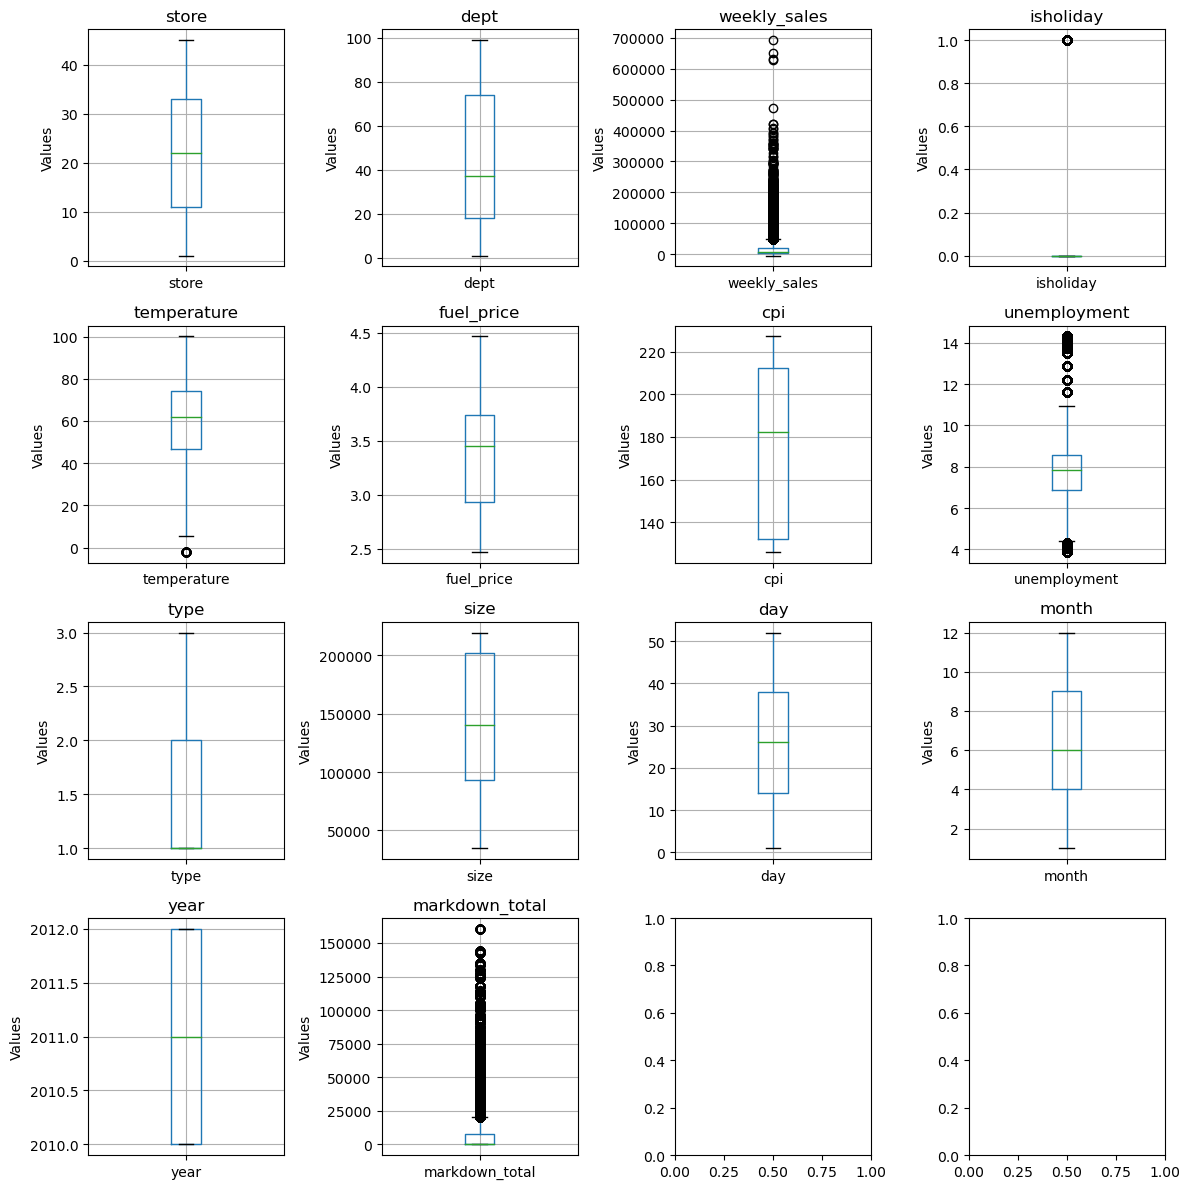

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Iterate over each column and create a boxplot
for i, column in enumerate(data.columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Values')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()



In [36]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   store           421570 non-null  int64  
 1   dept            421570 non-null  int64  
 2   weekly_sales    421570 non-null  float64
 3   isholiday       421570 non-null  int32  
 4   temperature     421570 non-null  float64
 5   fuel_price      421570 non-null  float64
 6   cpi             421570 non-null  float64
 7   unemployment    421570 non-null  float64
 8   type            421570 non-null  int64  
 9   size            421570 non-null  int64  
 10  day             421570 non-null  int64  
 11  month           421570 non-null  int64  
 12  year            421570 non-null  int64  
 13  markdown_total  421570 non-null  float64
dtypes: float64(6), int32(1), int64(7)
memory usage: 46.6 MB


# Correlation Analysis
Correlation analysis is a statistical technique used to measure the strength and direction of the relationship between two or more variables. In the context of the data DataFrame, you can perform correlation analysis to identify relationships between different numerical variables. Here's how you can conduct correlation analysis:

### 1. Calculate the correlation matrix: Use the corr() method on the data DataFrame to compute the correlation coefficients between all pairs of numerical variables. 

In [37]:
correlation_matrix = data.corr()


### 2.Visualize the correlation matrix: Plotting a heatmap of the correlation matrix can provide a visual representation of the correlation coefficients.

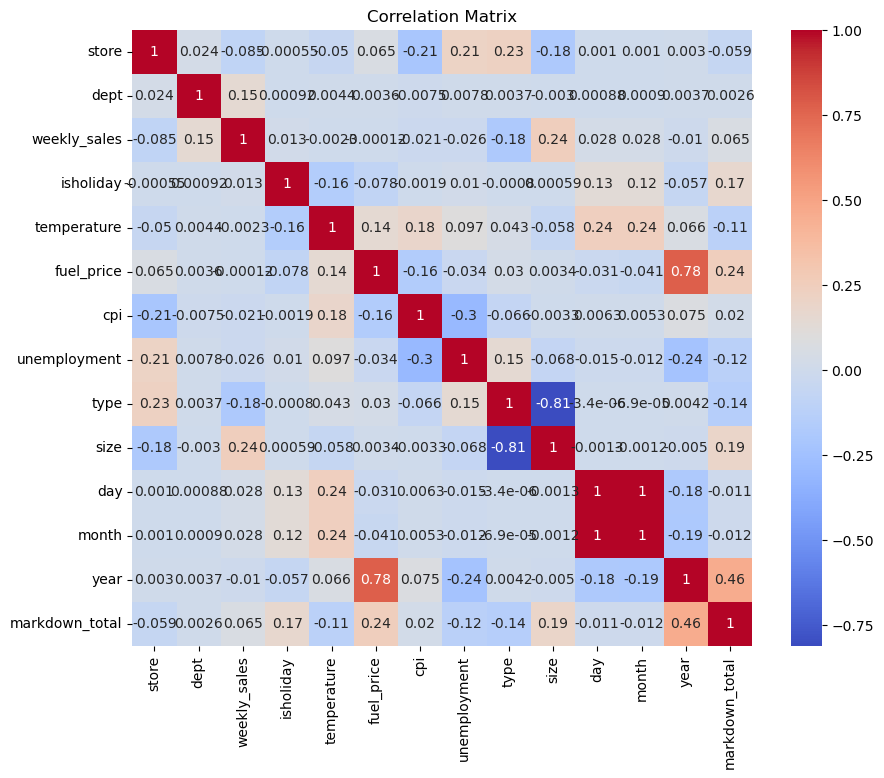

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Sales Analysis

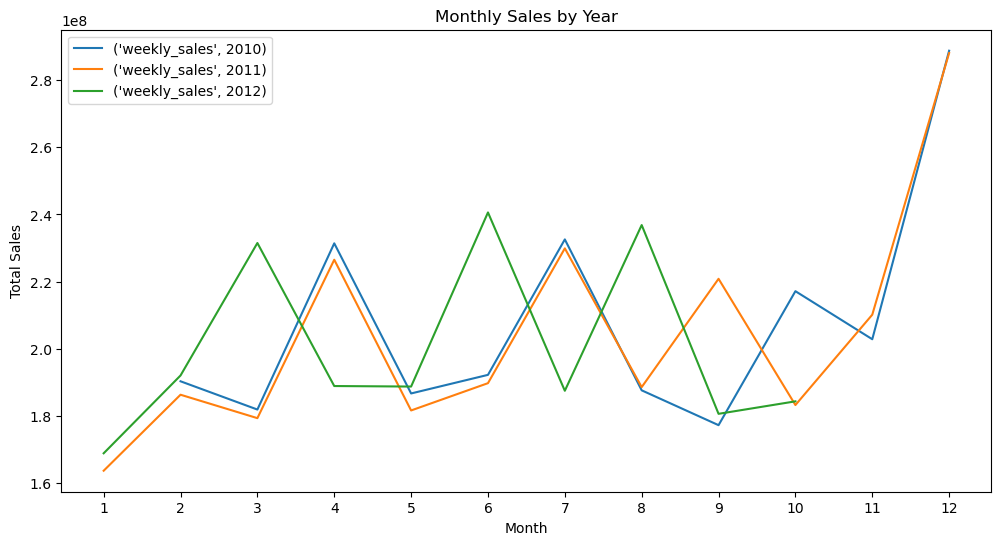

In [39]:
import matplotlib.pyplot as plt

monthly_sales = data.groupby([data.index.year, data.index.month]).agg({'weekly_sales': 'sum'})
monthly_sales = monthly_sales.unstack(level=0)

plt.figure(figsize=(12, 6))
for year in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[year], label=str(year))
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(range(1, 13))
plt.show()



from above line graph, the sales trend for the years 2010 and 2011 was the same from month of February to August.


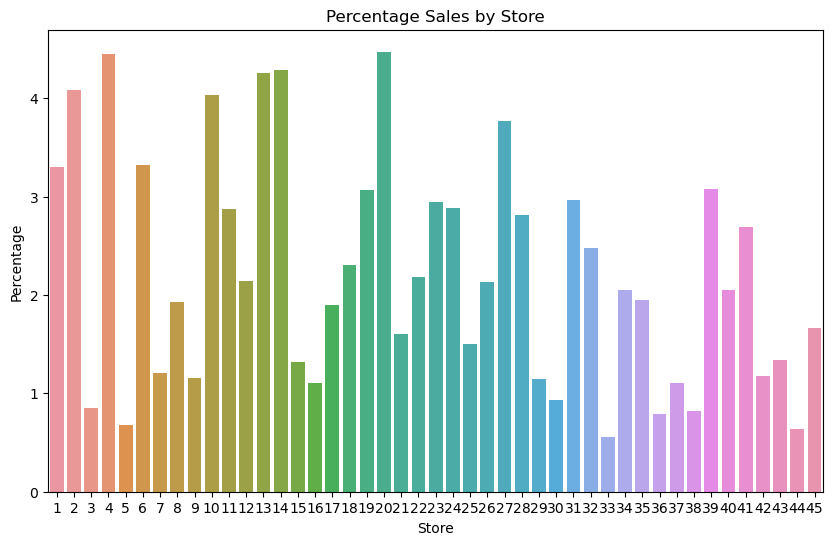

In [44]:

import seaborn as sns


# Calculate the total weekly sales by store
store_sales = data.groupby('store')['weekly_sales'].sum().reset_index()

# Calculate the percentage sales by store
store_sales['percentage'] = (store_sales['weekly_sales'] / store_sales['weekly_sales'].sum()) * 100

# Create the bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=store_sales, x='store', y='percentage')
plt.title('Percentage Sales by Store')
plt.xlabel('Store')
plt.ylabel('Percentage')
plt.show()


Top **20 stores** in terms of sales.

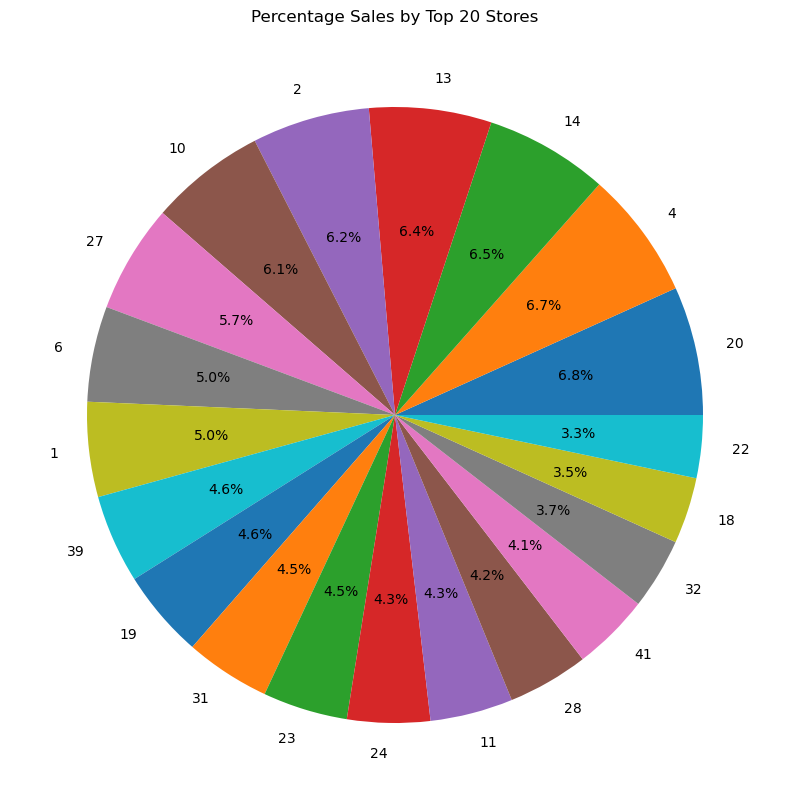

In [41]:
import matplotlib.pyplot as plt

top_stores = data.groupby('store')['weekly_sales'].sum().sort_values(ascending=False).head(20)
store_percentages = (top_stores / top_stores.sum()) * 100

plt.figure(figsize=(10, 10))
plt.pie(store_percentages, labels=top_stores.index, autopct='%1.1f%%')
plt.title('Percentage Sales by Top 20 Stores')
plt.show()


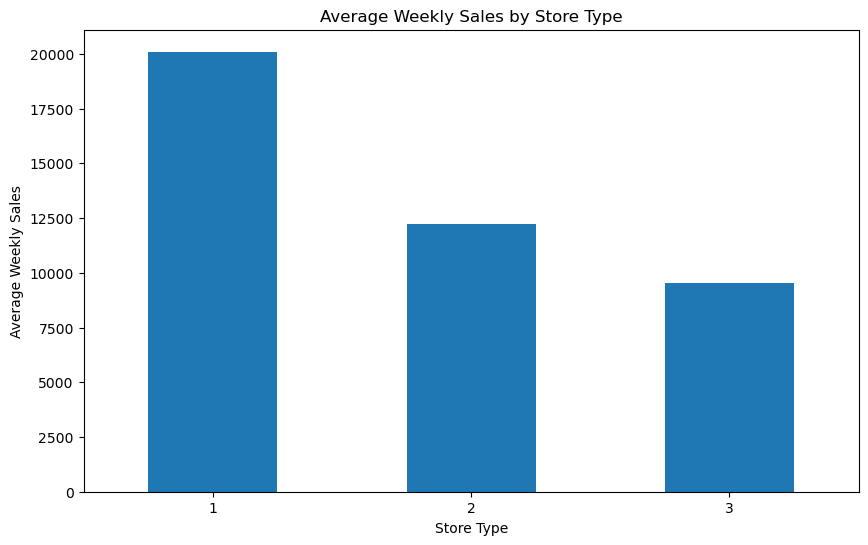

In [43]:
plt.figure(figsize=(10, 6))
data.groupby('type')['weekly_sales'].mean().plot(kind='bar')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store Type')
plt.xticks(rotation=0)
plt.show()


<Figure size 1200x600 with 0 Axes>

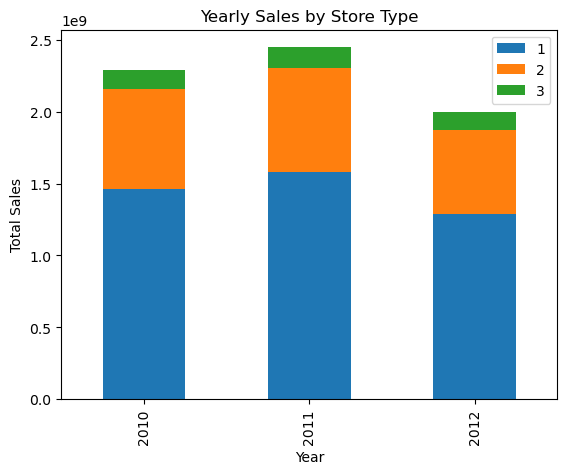

In [44]:
import matplotlib.pyplot as plt

# Group the data by store type and year and calculate the sum of sales
sales_by_type_year = data.groupby(['type', data.index.year])['weekly_sales'].sum()

# Reshape the data to have store types as columns
sales_by_type_year = sales_by_type_year.unstack(level='type')

# Plot the yearly sales for each store type
plt.figure(figsize=(12, 6))
sales_by_type_year.plot(kind='bar', stacked=True)

plt.title('Yearly Sales by Store Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

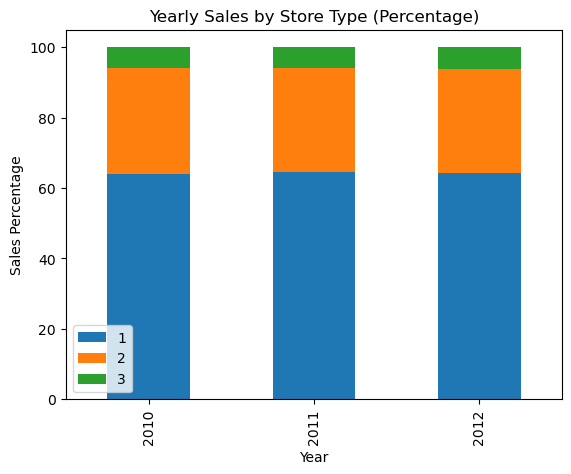

In [45]:
import matplotlib.pyplot as plt

# Group the data by store type and year and calculate the sum of sales
sales_by_type_year = data.groupby(['type', data.index.year])['weekly_sales'].sum()

# Reshape the data to have store types as columns
sales_by_type_year = sales_by_type_year.unstack(level='type')

# Calculate the percentage of sales for each store type
total_sales_by_year = sales_by_type_year.sum(axis=1)
sales_by_type_year_percent = (sales_by_type_year.div(total_sales_by_year, axis=0) * 100)

# Plot the yearly sales for each store type as percentages
plt.figure(figsize=(12, 6))
sales_by_type_year_percent.plot(kind='bar', stacked=True)

plt.title('Yearly Sales by Store Type (Percentage)')
plt.xlabel('Year')
plt.ylabel('Sales Percentage')
plt.legend()
plt.show()


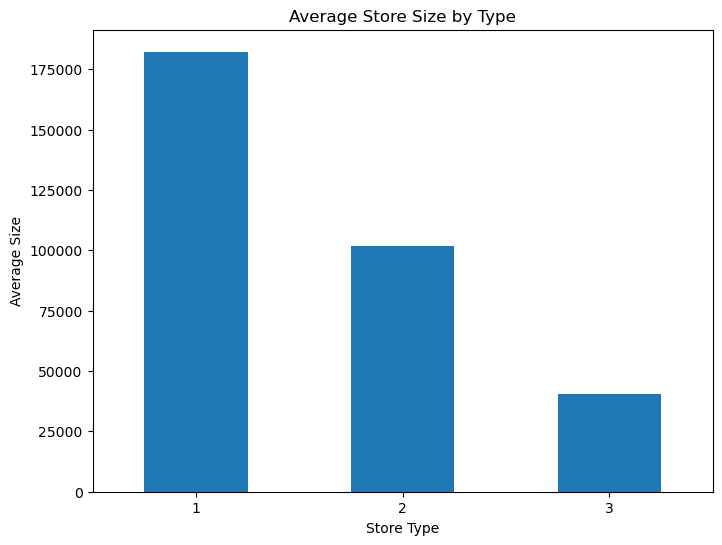

In [45]:

# Calculate the average size of each store type
average_size_by_type = data.groupby('type')['size'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
average_size_by_type.plot(kind='bar')
plt.title('Average Store Size by Type')
plt.xlabel('Store Type')
plt.ylabel('Average Size')
plt.xticks(rotation=0)
plt.show()


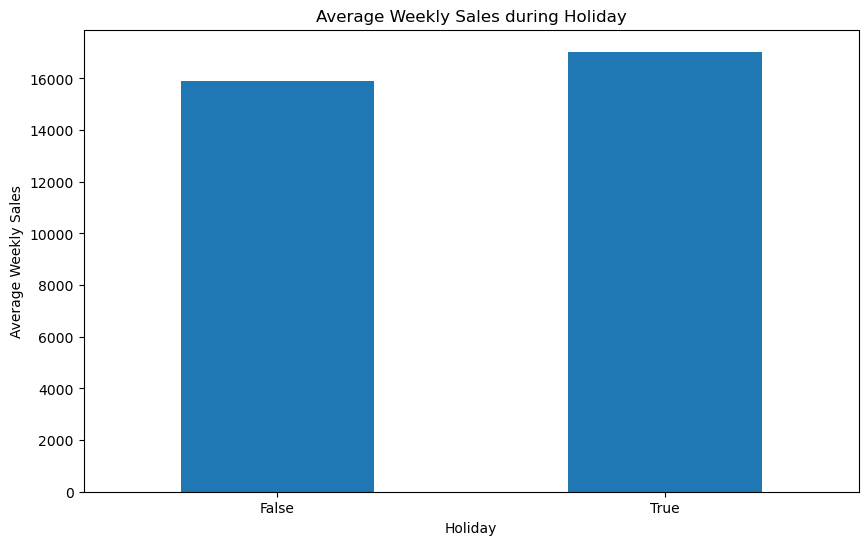

In [50]:


# Modify labeling
label_mapping = {0: 'False', 1: 'True'}
data['isholiday_label'] = data['isholiday'].map(label_mapping)

# Create a bar plot
plt.figure(figsize=(10, 6))
data.groupby('isholiday_label')['weekly_sales'].mean().plot(kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales during Holiday')
plt.xticks(rotation=0)
plt.show()



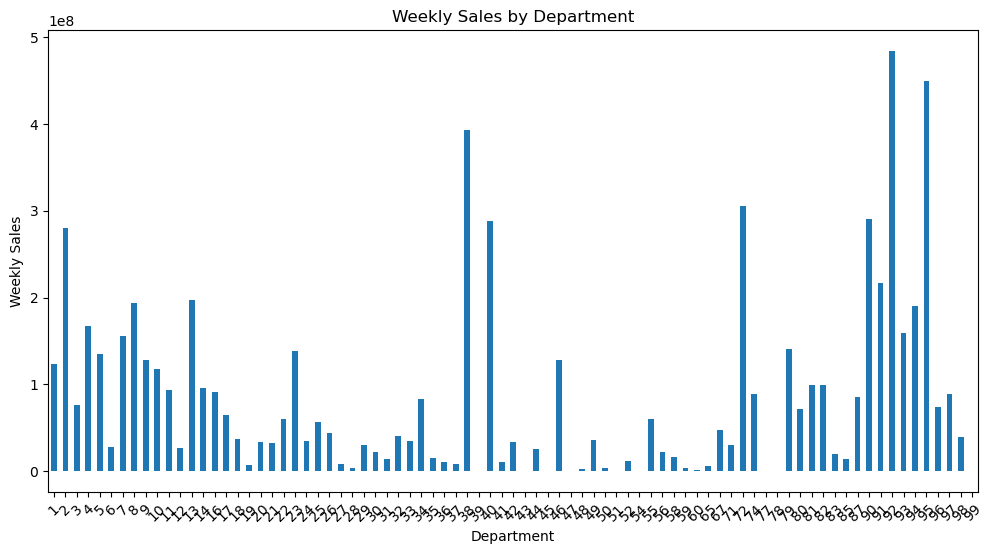

In [47]:
import matplotlib.pyplot as plt

# Group the data by department and calculate the sum of weekly sales
sales_by_department = data.groupby('dept')['weekly_sales'].sum()

# Plot the weekly sales by department
plt.figure(figsize=(12, 6))
sales_by_department.plot(kind='bar')

plt.title('Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()


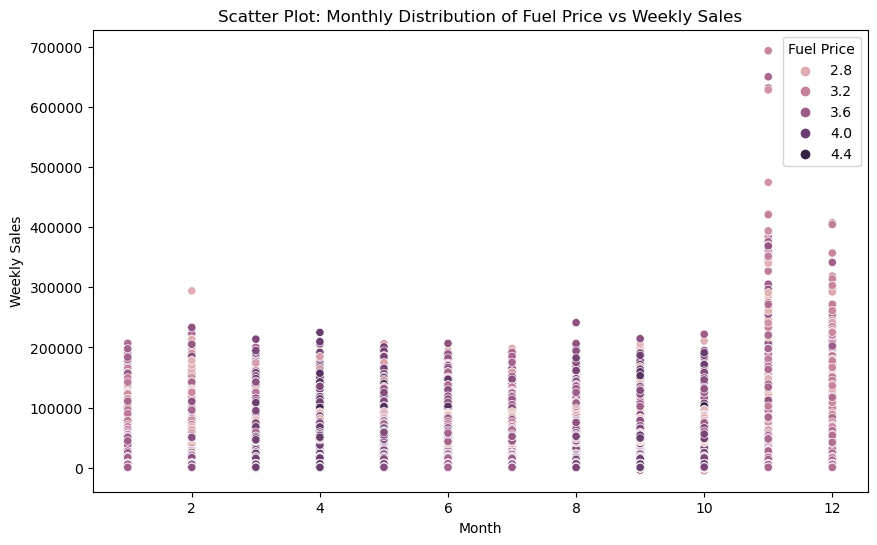

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the month from the date column
data['month'] = pd.to_datetime(data.index).month

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='month', y='weekly_sales', hue='fuel_price')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot: Monthly Distribution of Fuel Price vs Weekly Sales')
plt.legend(title='Fuel Price')
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='weekly_sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Time Series Plot: Weekly Sales')
plt.show()


# Seasonality Analysis

**1.Resampling:** Resample the data to a lower frequency (e.g., monthly or yearly) and calculate the mean or sum of the sales for each period. This can help identify larger trends and seasonality patterns over longer time spans.

In [ ]:
# Resample data to monthly frequency and calculate mean sales
monthly_sales = data['weekly_sales'].resample('M').mean()

# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Trend')
plt.show()


**3.Rolling Statistics:** Calculate rolling statistics such as moving averages or rolling sums over specific time windows (e.g., 7-day or 30-day windows) to observe any recurring patterns or trends.

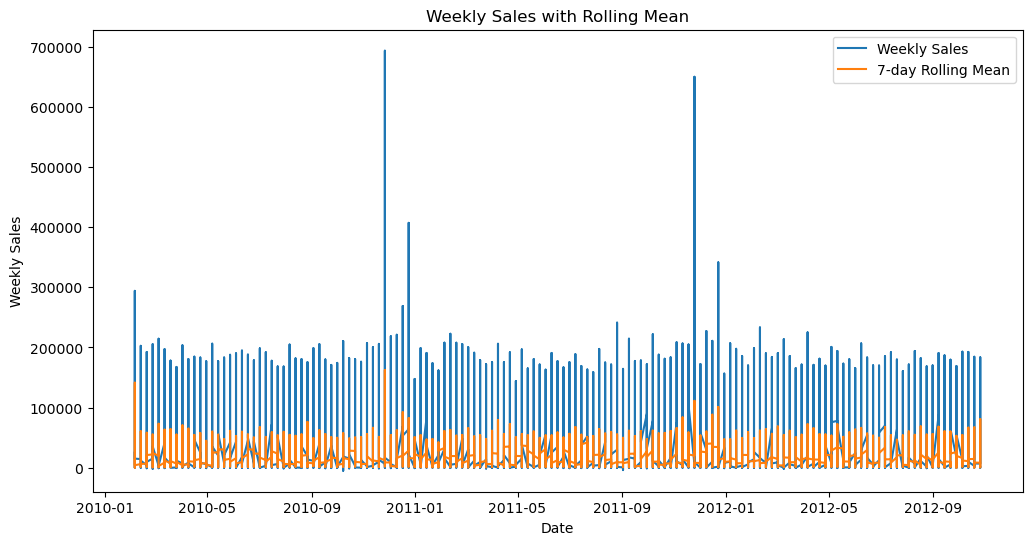

In [52]:
# Calculate rolling mean over a 7-day window
rolling_mean = data['weekly_sales'].rolling(window=7).mean()

# Plot rolling mean
plt.figure(figsize=(12, 6))
plt.plot(data['weekly_sales'], label='Weekly Sales')
plt.plot(rolling_mean, label='7-day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales with Rolling Mean')
plt.legend()
plt.show()


# Time Series Analysis.

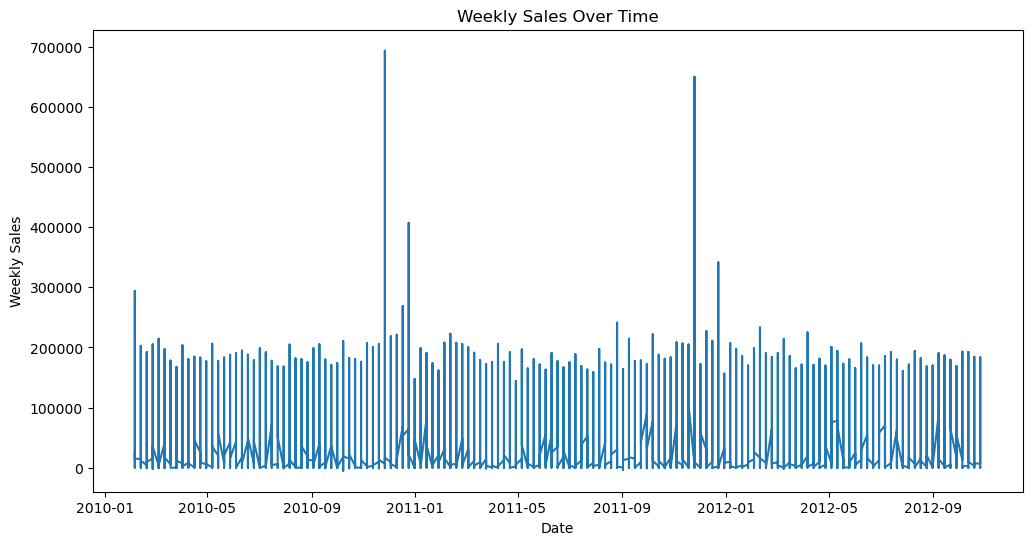

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['weekly_sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


Decompose the Time Series: Decompose the time series into its components (trend, seasonality, and residual) to understand the underlying patterns.

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['weekly_sales'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['weekly_sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

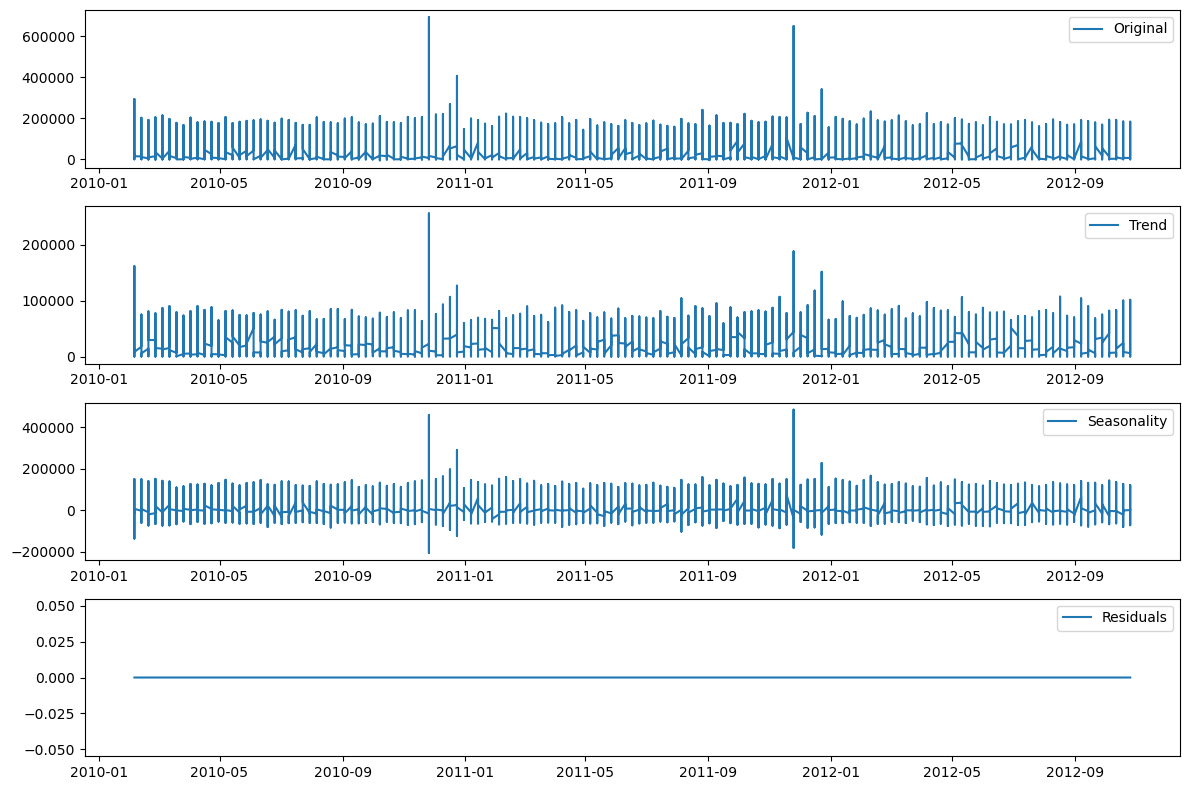

In [62]:
window = 4  # Adjust the window size as needed
rolling_mean = data['weekly_sales'].rolling(window=window, center=True).mean()
trend = rolling_mean
seasonal = data['weekly_sales'] - rolling_mean
residual = data['weekly_sales'] - trend - seasonal

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['weekly_sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Stationarity Check: Evaluate the stationarity of the time series using statistical tests like the Augmented Dickey-Fuller (ADF) test or visual inspection of rolling statistics.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Split data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train_data = data.iloc[:train_size]['weekly_sales']
test_data = data.iloc[train_size:]['weekly_sales']

# Fit ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make forecasts
predictions = model_fit.forecast(steps=len(test_data))[0]

# Evaluate the model
mae = mean_absolute_error(test_data, predictions)
print("Mean Absolute Error:", mae)

# Plot the actual values and predictions
plt.figure(figsize=(12, 6))
plt.plot(data['weekly_sales'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('ARIMA - Weekly Sales Forecast')
plt.legend()
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: 0

# Model Development

## 1. Multi Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the independent variables (x) and dependent variable (y)
x = data.drop('weekly_sales', axis=1)
y = data['weekly_sales']

# Perform data normalization on the independent variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [72]:
lr = LinearRegression()
lr.fit(x_train, y_train)
linear_regression_accuracy = lr.score(x_test,y_test)*100
print("Linear Regressor Accuracy - ",linear_regression_accuracy)

Linear Regressor Accuracy -  8.852711892839704
